In [2]:
import nltk 
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from gensim import corpora , models
import matplotlib.pyplot as plt

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\NITRO V
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NITRO V 15\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\NITRO V
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
nlp = spacy.load("en_core_web_sm")

In [7]:
correct_answer = "Photosynthesis is the process by which green plants and some other organisms use sunlight to synthesize foods from carbon dioxide and water. Oxygen is released as a byproduct."
student_answer = "Plants use sunlight and water to make food.  It makes oxygen too."  #Improper answer

In [9]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char == ' ']) 
    text = ' '.join(text.split())
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

In [10]:
processed_correct = preprocess_text(correct_answer)
processed_student = preprocess_text(student_answer)

In [11]:
correct_tokens = nlp(processed_correct)
student_tokens = nlp(processed_student)

In [12]:
print("Correct Answer Entities:", [(ent.text, ent.label_) for ent in correct_tokens.ents])
print("Student Answer Entities:", [(ent.text, ent.label_) for ent in student_tokens.ents])

Correct Answer Entities: []
Student Answer Entities: []


In [13]:
documents = [processed_correct, processed_student]
dictionary = corpora.Dictionary(doc.split() for doc in documents)
corpus = [dictionary.doc2bow(doc.split()) for doc in documents]
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary)

In [14]:
for topic in lda_model.show_topics():
    print(topic)

(0, '0.087*"plants" + 0.082*"use" + 0.081*"sunlight" + 0.079*"oxygen" + 0.077*"water" + 0.070*"makes" + 0.067*"make" + 0.067*"food" + 0.042*"organisms" + 0.042*"foods"')
(1, '0.070*"water" + 0.068*"oxygen" + 0.066*"sunlight" + 0.066*"use" + 0.062*"plants" + 0.059*"carbon" + 0.058*"photosynthesis" + 0.058*"byproduct" + 0.058*"released" + 0.057*"green"')


In [15]:
from textblob import TextBlob
correct_sentiment = TextBlob(correct_answer).sentiment.polarity
student_sentiment = TextBlob(student_answer).sentiment.polarity
print("Correct Answer Sentiment:", correct_sentiment)
print("Student Answer Sentiment:", student_sentiment)

Correct Answer Sentiment: -0.1625
Student Answer Sentiment: 0.0


In [16]:
correct_keywords = set(processed_correct.split())
student_keywords = set(processed_student.split())

In [17]:
missing_keywords = correct_keywords - student_keywords
print("Missing Keywords:", missing_keywords)

Missing Keywords: {'foods', 'green', 'photosynthesis', 'dioxide', 'released', 'synthesize', 'process', 'carbon', 'organisms', 'byproduct'}


In [18]:
correct_embedding = np.mean([token.vector for token in correct_tokens if token.has_vector], axis=0)
student_embedding = np.mean([token.vector for token in student_tokens if token.has_vector], axis=0)

Semantic Similarity: 0.66198015


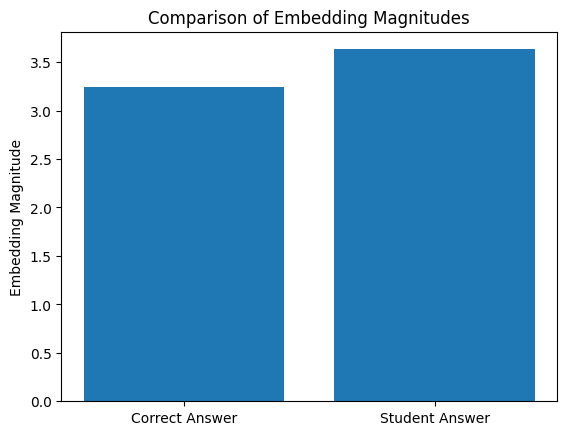

In [19]:
if not np.isnan(correct_embedding).any() and not np.isnan(student_embedding).any():  # Check for valid vectors
    similarity = cosine_similarity(correct_embedding.reshape(1, -1), student_embedding.reshape(1, -1))[0][0]
    print("Semantic Similarity:", similarity)

    # Example Visualization (Bar chart)
    labels = ['Correct Answer', 'Student Answer']
    embeddings = [np.linalg.norm(correct_embedding), np.linalg.norm(student_embedding)] #magnitude of vectors

    plt.bar(labels, embeddings)
    plt.ylabel('Embedding Magnitude')
    plt.title('Comparison of Embedding Magnitudes')
    plt.show()
else:
    print("Could not calculate semantic similarity due to missing word vectors.")

In [20]:
knowledge_gaps = list(missing_keywords)
print("Knowledge Gaps:", knowledge_gaps)

Knowledge Gaps: ['foods', 'green', 'photosynthesis', 'dioxide', 'released', 'synthesize', 'process', 'carbon', 'organisms', 'byproduct']
